# <center>Kidney Disease Detection</center>

## Overview:
The dataset was collected from PACS (Picture archiving and communication system) from different hospitals in Dhaka, Bangladesh where patients were already diagnosed with having a kidney tumor, cyst, normal or stone findings. Both the Coronal and Axial cuts were selected from both contrast and non-contrast studies with protocol for the whole abdomen and urogram. The Dicom study was then carefully selected, one diagnosis at a time, and from those we created a batch of Dicom images of the region of interest for each radiological finding. Following that, we excluded each patient's information and meta data from the Dicom images and converted the Dicom images to a lossless jpg image format. After the conversion, each image finding was again verified by a radiologist and a medical technologist to reconfirm the correctness of the data.

Types of Things We've taken for Detection:
* Cysts
* Stones
* Tumors

 unique data within it in which the cyst contains 3,709, normal 5,077, stone 1,377, and tumor 2,283

## Dataset Information:

Kidney CT Scan Dataset: [Kaggle - Kidney Disease Detection](https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone/data?select=CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone)

This dataset of size 2GB contains 12,446 images of human kidney CT scan images which are classified into 4 classes: Cyst, Normal, Stone, Tumor.

### Training Data:

   * Cyst: 2968 Images
   * Normal: 4062 Images
   * Stone: 1102 Images
   * Tumor: 1827 Images
   
### Testing Data:

   * Cyst: 741 Images
   * Normal: 1015 Images
   * Stone: 275 Images
   * Tumor: 456 Images

# Importing Libraries

In [2]:
import warnings
warnings.simplefilter('ignore')

import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

In [10]:
batch_size,img_height,img_width = 32, 150, 150
data_dir='/content/drive/MyDrive/Datasets/Datasets/KidneyCT'
train=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.1,
                                                subset='training',seed=123)
val=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.2,
                                                subset='validation',seed=123)

Found 12456 files belonging to 4 classes.
Using 11211 files for training.
Found 12456 files belonging to 4 classes.
Using 2491 files for validation.


In [11]:
label_to_class_name = dict(zip(range(len(train.class_names)), train.class_names))
label_to_class_name

{0: 'Cyst', 1: 'Normal', 2: 'Stone', 3: 'Tumor'}

**Data preprocessing**

In [12]:
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

# 3. Building Deep Learning Models

## 3.1 Convolutional Neural Network Training and Evaluation

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train,validation_data=val,epochs=15)

Epoch 1/15
351/351 [==============================] - 1076s 3s/step - loss: 0.1518 - accuracy: 0.9472 - val_loss: 0.0107 - val_accuracy: 0.9972
Epoch 2/15
351/351 [==============================] - 6s 17ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 1.3954e-04 - val_accuracy: 1.0000
Epoch 3/15
351/351 [==============================] - 6s 17ms/step - loss: 7.8242e-05 - accuracy: 1.0000 - val_loss: 5.8397e-05 - val_accuracy: 1.0000
Epoch 4/15
351/351 [==============================] - 6s 18ms/step - loss: 3.8986e-05 - accuracy: 1.0000 - val_loss: 3.3812e-05 - val_accuracy: 1.0000
Epoch 5/15
351/351 [==============================] - 6s 17ms/step - loss: 2.3802e-05 - accuracy: 1.0000 - val_loss: 2.1893e-05 - val_accuracy: 1.0000
Epoch 6/15
351/351 [==============================] - 6s 17ms/step - loss: 1.5922e-05 - accuracy: 1.0000 - val_loss: 1.5133e-05 - val_accuracy: 1.0000
Epoch 7/15
351/351 [==============================] - 6s 17ms/step - loss: 1.1233e-05 - accuracy: 1.0000 

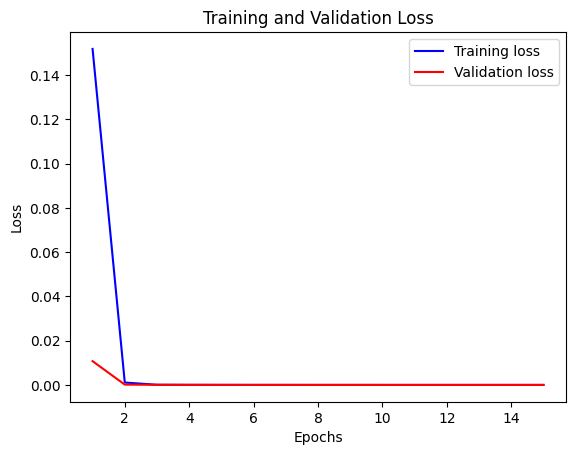

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

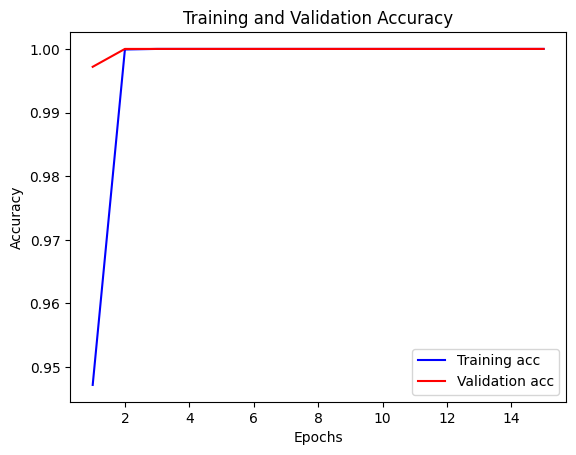

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

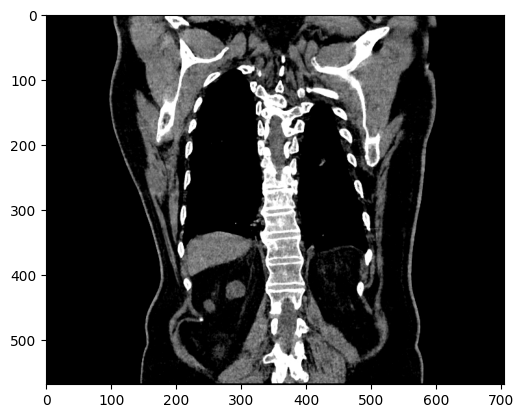

1/1 [==============================] - 0s 308ms/step


'Cyst'

In [20]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Datasets/KidneyCT/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

## 3.2 VGG-16 Model Training and Evaluation

In [21]:
VGG_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())  # Batch Normalization layer
VGG_model.add(Dropout(0.5))

VGG_model.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

VGG_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

58889256/58889256 [==============================] - 1s 0us/step


In [23]:
VGG_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                      

In [24]:
history = VGG_model.fit(train,validation_data=val,epochs=15)

Epoch 1/15
351/351 [==============================] - 43s 100ms/step - loss: 0.5031 - accuracy: 0.8130 - val_loss: 0.5800 - val_accuracy: 0.7599
Epoch 2/15
351/351 [==============================] - 35s 98ms/step - loss: 0.2238 - accuracy: 0.9170 - val_loss: 0.1192 - val_accuracy: 0.9562
Epoch 3/15
351/351 [==============================] - 30s 86ms/step - loss: 0.1639 - accuracy: 0.9419 - val_loss: 0.1184 - val_accuracy: 0.9582
Epoch 4/15
351/351 [==============================] - 29s 84ms/step - loss: 0.1386 - accuracy: 0.9509 - val_loss: 0.0725 - val_accuracy: 0.9775
Epoch 5/15
351/351 [==============================] - 30s 85ms/step - loss: 0.1216 - accuracy: 0.9562 - val_loss: 0.0574 - val_accuracy: 0.9815
Epoch 6/15
351/351 [==============================] - 30s 85ms/step - loss: 0.1046 - accuracy: 0.9631 - val_loss: 0.0504 - val_accuracy: 0.9876
Epoch 7/15
351/351 [==============================] - 30s 85ms/step - loss: 0.1074 - accuracy: 0.9608 - val_loss: 0.0791 - val_accuracy

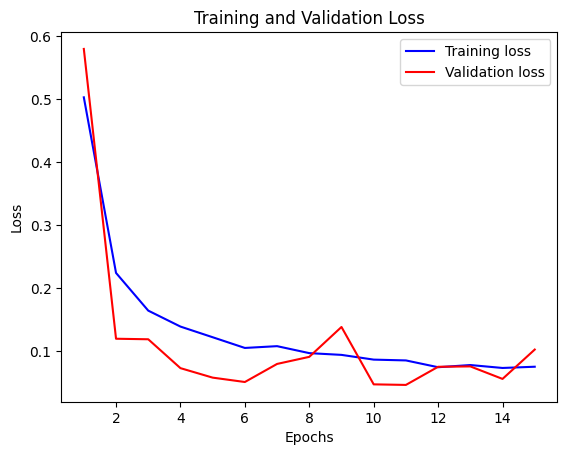

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

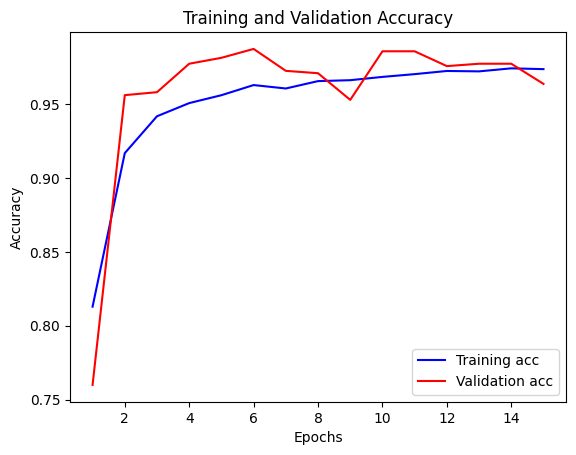

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

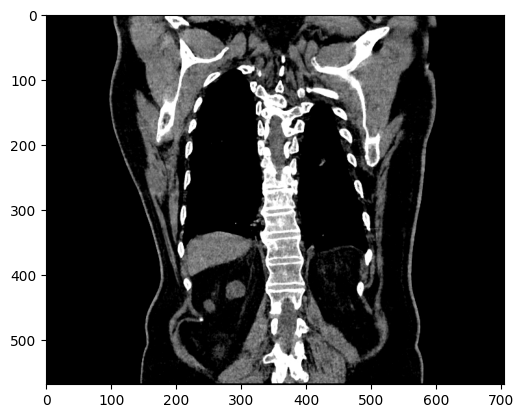

1/1 [==============================] - 1s 1s/step


'Cyst'

In [28]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Datasets/KidneyCT/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = VGG_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

## 3.3 MobileNet Model Training and Evaluation

In [29]:
mobile_net = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


mobile_net.add(pretrained_model)
mobile_net.add(Flatten())
mobile_net.add(Dense(512, activation='relu'))
mobile_net.add(BatchNormalization())  # Batch Normalization layer
mobile_net.add(Dropout(0.5))

mobile_net.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

9406464/9406464 [==============================] - 0s 0us/step


In [30]:
mobile_net.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
mobile_net.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 flatten_2 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                

In [32]:
epochs=15
history = mobile_net.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
351/351 [==============================] - 17s 33ms/step - loss: 0.3977 - accuracy: 0.8587 - val_loss: 0.1535 - val_accuracy: 0.9518
Epoch 2/15
351/351 [==============================] - 9s 27ms/step - loss: 0.1290 - accuracy: 0.9575 - val_loss: 0.0688 - val_accuracy: 0.9799
Epoch 3/15
351/351 [==============================] - 10s 27ms/step - loss: 0.0811 - accuracy: 0.9728 - val_loss: 0.0346 - val_accuracy: 0.9912
Epoch 4/15
351/351 [==============================] - 10s 28ms/step - loss: 0.0603 - accuracy: 0.9803 - val_loss: 0.0376 - val_accuracy: 0.9864
Epoch 5/15
351/351 [==============================] - 10s 29ms/step - loss: 0.0482 - accuracy: 0.9846 - val_loss: 0.0353 - val_accuracy: 0.9884
Epoch 6/15
351/351 [==============================] - 10s 29ms/step - loss: 0.0494 - accuracy: 0.9837 - val_loss: 0.0192 - val_accuracy: 0.9948
Epoch 7/15
351/351 [==============================] - 10s 28ms/step - loss: 0.0378 - accuracy: 0.9873 - val_loss: 0.0654 - val_accuracy: 

**Ploting Loss and Accuracy**

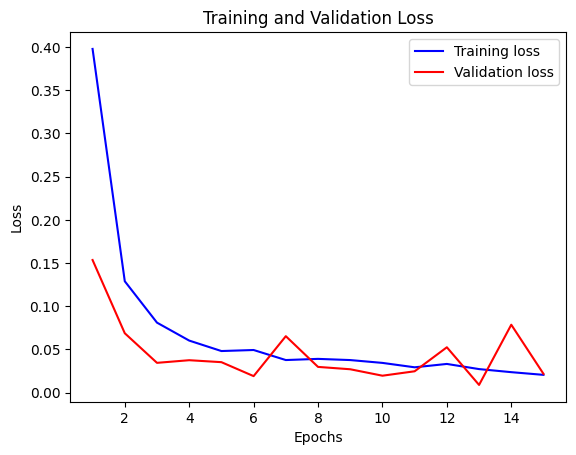

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

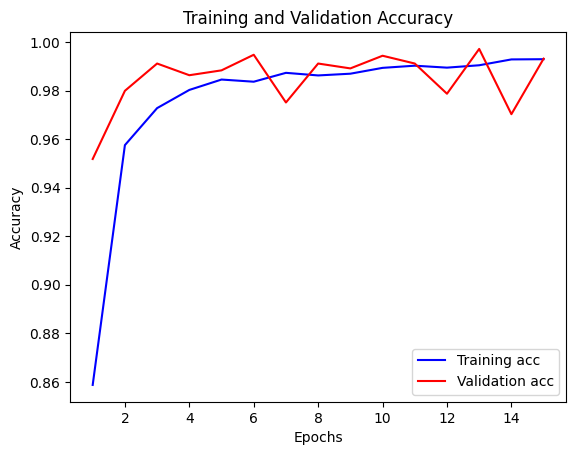

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

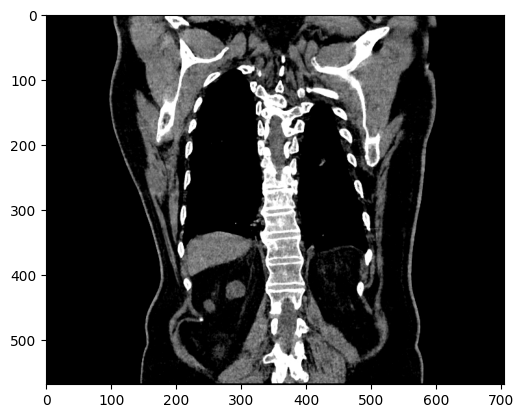

1/1 [==============================] - 1s 1s/step


'Cyst'

In [35]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Datasets/KidneyCT/Cyst/Cyst- (1).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = mobile_net.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

# Saving Model

In [36]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Testing Model

In [ ]:
img = cv2.imread('/kaggle/input/ct-kidney-dataset-normal-cyst-tumor-and-stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1000).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = loaded_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]